## Project 3: Neural Networks and kNN
### Experimentation with kNN- First Dataset (Facebook Comments)

Research on kNN:
<br> https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

#### Import packages.

In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

#### Import Data Set 1.

In [3]:
facebook = pd.read_csv('Features_Variant_1.csv', header=None)
test1 = pd.read_csv('Test_Case_1.csv', header=None)
test2 = pd.read_csv('Test_Case_2.csv', header=None)
test3 = pd.read_csv('Test_case_3.csv', header=None)
test4 = pd.read_csv('Test_case_4.csv', header=None)
test5 = pd.read_csv('Test_case_5.csv', header=None)
test6 = pd.read_csv('Test_case_6.csv', header=None)
test7 = pd.read_csv('Test_case_7.csv', header=None)
test8 = pd.read_csv('Test_case_8.csv', header=None)
test9 = pd.read_csv('Test_case_9.csv', header=None)
test10 = pd.read_csv('Test_case_10.csv', header=None)

In [4]:
facebook = facebook.append([test1, test2, test3, test4, test5, test6, test7, test8, test9, test10], ignore_index=True)

In [5]:
new_names = ['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3', 'PageCategory_4']
old_names = facebook.columns[0:4]
facebook.rename(columns=dict(zip(old_names, new_names)), inplace=True)

new_names2 = ['CommentsBeforeBase_30', 'CommentsLast24h_31', 'CommentsLast48to24h_32', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'BaseTime_35',
'PostLength_36', 'PostShareCnt_37', 'PostPromoStatus_38', 'HoursReceived_39', 'SundayPublished_40', 'MondayPublished_41', 'TuesdayPublisher_42',
'WednesdayPublished_43', 'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46', 'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49',
'WednesdayBase_50', 'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53','CommentsNextH_Hours_54']
old_names2 = facebook.columns[29:54]
facebook.rename(columns=dict(zip(old_names2, new_names2)), inplace=True)

facebook2 = facebook.iloc[:, np.r_[0:4, 29:54]]
facebook2 = facebook2.drop('PostPromoStatus_38', axis=1)

#### Scale features for use in kNN.

In [6]:
mean_1 = sum(facebook2['PagePopularity_1'])/len(facebook2['PagePopularity_1'])
sd_1 = np.std(facebook2['PagePopularity_1'])
mean_2 = sum(facebook2['PageCheckins_2'])/len(facebook2['PageCheckins_2'])
sd_2 = np.std(facebook2['PageCheckins_2'])
mean_3 = sum(facebook2['PageTalkingAbout_3'])/len(facebook2['PageTalkingAbout_3'])
sd_3 = np.std(facebook2['PageTalkingAbout_3'])
mean_4 = sum(facebook2['PageCategory_4'])/len(facebook2['PageCategory_4'])
sd_4 = np.std(facebook2['PageCategory_4'])
mean_30 = sum(facebook2['CommentsBeforeBase_30'])/len(facebook2['CommentsBeforeBase_30'])
sd_30 = np.std(facebook2['CommentsBeforeBase_30'])
mean_31 = sum(facebook2['CommentsLast24h_31'])/len(facebook2['CommentsLast24h_31'])
sd_31 = np.std(facebook2['CommentsLast24h_31'])
mean_32= sum(facebook2['CommentsLast48to24h_32'])/len(facebook2['CommentsLast48to24h_32'])
sd_32 = np.std(facebook2['CommentsLast48to24h_32'])
mean_33= sum(facebook2['CommentsFirst24h_33'])/len(facebook2['CommentsFirst24h_33'])
sd_33 = np.std(facebook2['CommentsFirst24h_33'])
mean_34 = sum(facebook2['CommentsDiffFirstSecondDay_34'])/len(facebook2['CommentsDiffFirstSecondDay_34'])
sd_34 = np.std(facebook2['CommentsDiffFirstSecondDay_34'])
### find out if you should scale BaseTime 
mean_36 = sum(facebook2['PostLength_36'])/len(facebook2['PostLength_36'])
sd_36 = np.std(facebook2['PostLength_36'])
mean_37 = sum(facebook2['PostShareCnt_37'])/len(facebook2['PostShareCnt_37'])
sd_37 = np.std(facebook2['PostShareCnt_37'])
### find out if you should scale HoursReceived 
mean_39 = sum(facebook2['HoursReceived_39'])/len(facebook2['HoursReceived_39'])
sd_39 = np.std(facebook2['HoursReceived_39'])
mean_40 = sum(facebook2['SundayPublished_40'])/len(facebook2['SundayPublished_40'])
sd_40 = np.std(facebook2['SundayPublished_40'])
mean_41 = sum(facebook2['MondayPublished_41'])/len(facebook2['MondayPublished_41'])
sd_41 = np.std(facebook2['MondayPublished_41'])
mean_42 = sum(facebook2['TuesdayPublisher_42'])/len(facebook2['TuesdayPublisher_42'])
sd_42 = np.std(facebook2['TuesdayPublisher_42'])
mean_43 = sum(facebook2['WednesdayPublished_43'])/len(facebook2['WednesdayPublished_43'])
sd_43 = np.std(facebook2['WednesdayPublished_43'])
mean_44 = sum(facebook2['ThursdayPublished_44'])/len(facebook2['ThursdayPublished_44'])
sd_44 = np.std(facebook2['ThursdayPublished_44'])
mean_45 = sum(facebook2['FridayPublished_45'])/len(facebook2['FridayPublished_45'])
sd_45 = np.std(facebook2['FridayPublished_45'])
mean_46 = sum(facebook2['SaturdayPublished_46'])/len(facebook2['SaturdayPublished_46'])
sd_46 = np.std(facebook2['SaturdayPublished_46'])
mean_47 = sum(facebook2['SundayBase_47'])/len(facebook2['SundayBase_47'])
sd_47 = np.std(facebook2['SundayBase_47'])
mean_48 = sum(facebook2['MondayBase_48'])/len(facebook2['MondayBase_48'])
sd_48 = np.std(facebook2['MondayBase_48'])
mean_49 = sum(facebook2['TuesdayBase_49'])/len(facebook2['TuesdayBase_49'])
sd_49 = np.std(facebook2['TuesdayBase_49'])
mean_50 = sum(facebook2['WednesdayBase_50'])/len(facebook2['WednesdayBase_50'])
sd_50 = np.std(facebook2['WednesdayBase_50'])
mean_51 = sum(facebook2['ThursdayBase_51'])/len(facebook2['ThursdayBase_51'])
sd_51 = np.std(facebook2['ThursdayBase_51'])
mean_52 = sum(facebook2['FridayBase_52'])/len(facebook2['FridayBase_52'])
sd_52 = np.std(facebook2['FridayBase_52'])
mean_53 = sum(facebook2['SaturdayBase_53'])/len(facebook2['SaturdayBase_53'])
sd_53 = np.std(facebook2['SaturdayBase_53'])
## DO NOT scale the target (54)

In [7]:
facebook2_s = facebook2.copy()

In [8]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


In [9]:
facebook2_s['PagePopularity_1'] = (facebook2['PagePopularity_1'] - mean_1)/sd_1
facebook2_s['PageCheckins_2'] = (facebook2['PageCheckins_2'] - mean_2)/sd_2
facebook2_s['PageTalkingAbout_3'] = (facebook2['PageTalkingAbout_3'] - mean_3)/sd_3
facebook2_s['PageCategory_4'] = (facebook2['PageCategory_4'] - mean_4)/sd_4
facebook2_s['CommentsBeforeBase_30'] = (facebook2['CommentsBeforeBase_30'] - mean_30)/sd_30
facebook2_s['CommentsLast24h_31'] = (facebook2['CommentsLast24h_31'] - mean_31)/sd_31
facebook2_s['CommentsLast48to24h_32'] = (facebook2['CommentsLast48to24h_32'] - mean_32)/sd_32
facebook2_s['CommentsFirst24h_33'] = (facebook2['CommentsFirst24h_33'] - mean_33)/sd_33
facebook2_s['CommentsDiffFirstSecondDay_34'] = (facebook2['CommentsDiffFirstSecondDay_34'] - mean_34)/sd_34
## check to see if 35 should be scaled
facebook2_s['BaseTime_35'] = facebook2['BaseTime_35']
facebook2_s['PostLength_36'] = (facebook2['PostLength_36'] - mean_36)/sd_36
facebook2_s['PostShareCnt_37'] = (facebook2['PostShareCnt_37'] - mean_37)/sd_37
##facebook2_s['PostPromoStatus_38'] = (facebook2['PostPromoStatus_38'] - mean_38)/sd_38 --- appears to be zero
## check to see if 39 should be scaled
facebook2_s['HoursReceived_39'] = (facebook2['HoursReceived_39'] - mean_39)/sd_39
facebook2_s['SundayPublished_40'] = (facebook2['SundayPublished_40'] - mean_40)/sd_40
facebook2_s['MondayPublished_41'] = (facebook2['MondayPublished_41'] - mean_41)/sd_41
facebook2_s['TuesdayPublisher_42'] = (facebook2['TuesdayPublisher_42'] - mean_42)/sd_42
facebook2_s['WednesdayPublished_43'] = (facebook2['WednesdayPublished_43'] - mean_43)/sd_43
facebook2_s['ThursdayPublished_44'] = (facebook2['ThursdayPublished_44'] - mean_44)/sd_44
facebook2_s['FridayPublished_45'] = (facebook2['FridayPublished_45'] - mean_45)/sd_45
facebook2_s['SaturdayPublished_46'] = (facebook2['SaturdayPublished_46'] - mean_46)/sd_46
facebook2_s['SundayBase_47'] = (facebook2['SundayBase_47'] - mean_47)/sd_47
facebook2_s['MondayBase_48'] = (facebook2['MondayBase_48'] - mean_48)/sd_48
facebook2_s['TuesdayBase_49'] = (facebook2['TuesdayBase_49'] - mean_49)/sd_49
facebook2_s['WednesdayBase_50'] = (facebook2['WednesdayBase_50'] - mean_50)/sd_50
facebook2_s['ThursdayBase_51'] = (facebook2['ThursdayBase_51'] - mean_51)/sd_51
facebook2_s['FridayBase_52'] = (facebook2['FridayBase_52'] - mean_52)/sd_52
facebook2_s['SaturdayBase_53'] = (facebook2['SaturdayBase_53'] - mean_53)/sd_53
## don't scales the target
facebook2_s['CommentsNextH_Hours_54'] = facebook2['CommentsNextH_Hours_54']

In [10]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,65,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
1,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,10,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,2.430059,-0.413965,0
2,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,14,...,2.393547,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
3,-0.107749,-0.220202,-0.359973,-1.161633,-0.348015,-0.277312,-0.228578,-0.347915,-0.066027,62,...,2.393547,-0.40196,-0.413886,2.541964,-0.393962,-0.411909,-0.418774,-0.411513,-0.413965,0
4,-0.107749,-0.220202,-0.359973,-1.161633,-0.389937,-0.277312,-0.269467,-0.392598,-0.036157,58,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,2.427723,-0.418774,-0.411513,-0.413965,0


#### Estalish binary classification label.

In [11]:
#### Create binary variable for classification analysis. Apply to both the scaled and unscaled data sets.

facebook2['Comment_Y'] = facebook2['CommentsNextH_Hours_54']>0
facebook2['Comment_Y'] = facebook2['Comment_Y'].apply(int)
facebook2_s['Comment_Y'] = facebook2['Comment_Y']

In [12]:
X = facebook2.iloc[:, 0:27]
y = facebook2.iloc[:, 28:29]
X_s = facebook2_s.iloc[:, 0:27]
y_s = pd.DataFrame(facebook2_s.iloc[:, 28:29])

In [13]:
facebook2_s.columns

Index(['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3',
       'PageCategory_4', 'CommentsBeforeBase_30', 'CommentsLast24h_31',
       'CommentsLast48to24h_32', 'CommentsFirst24h_33',
       'CommentsDiffFirstSecondDay_34', 'BaseTime_35', 'PostLength_36',
       'PostShareCnt_37', 'HoursReceived_39', 'SundayPublished_40',
       'MondayPublished_41', 'TuesdayPublisher_42', 'WednesdayPublished_43',
       'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46',
       'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49', 'WednesdayBase_50',
       'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53',
       'CommentsNextH_Hours_54', 'Comment_Y'],
      dtype='object')

#### Split Data into testing and training.

In [14]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.3, random_state=4786)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4786)

## kNN

In [15]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
### default

In [17]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(Xs_train, ys_train['Comment_Y'])
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(Xs_train, ys_train['Comment_Y'])
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(Xs_test, ys_test['Comment_Y'])

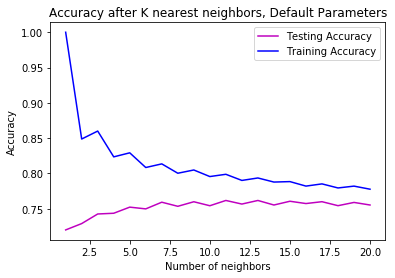

In [18]:
#Generate plot
plt.title('Accuracy after K nearest neighbors, Default Parameters')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color='m')
plt.plot(neighbors, train_accuracy, label='Training Accuracy', color='b')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
train_accuracy

array([0.99996594, 0.84872633, 0.85999864, 0.82345729, 0.82917859,
       0.80837079, 0.81351315, 0.80026563, 0.8048631 , 0.795566  ,
       0.7987672 , 0.79008309, 0.79355674, 0.78776733, 0.78841438,
       0.78204604, 0.78517913, 0.77942378, 0.78201199, 0.77765291])

In [20]:
test_accuracy

array([0.71998411, 0.72896305, 0.74255066, 0.74358363, 0.75224474,
       0.74978149, 0.75923719, 0.75343663, 0.75987286, 0.75423123,
       0.76170044, 0.75661502, 0.76170044, 0.7552642 , 0.760588  ,
       0.75733015, 0.75995232, 0.75431069, 0.75891935, 0.7552642 ])

In both Euclidean and Manhattan distances, k of 11 and 13 yield strong performance of the test set. Performance overall is slightly better with Manhattan distance.

In [21]:
knn_minkowski = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
knn_minkowski.fit(Xs_train, ys_train['Comment_Y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [22]:
mink = knn_minkowski.score(Xs_train, ys_train['Comment_Y'])

In [23]:
knn_manhattan = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
knn_manhattan.fit(Xs_train, ys_train['Comment_Y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [24]:
manh = knn_manhattan.score(Xs_train, ys_train['Comment_Y'])

In [25]:
knn_euclidean = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn_euclidean.fit(Xs_train, ys_train['Comment_Y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [26]:
eucl = knn_euclidean.score(Xs_train, ys_train['Comment_Y'])

Text(0.5, 1.0, 'Accuracy by Measurement Type')

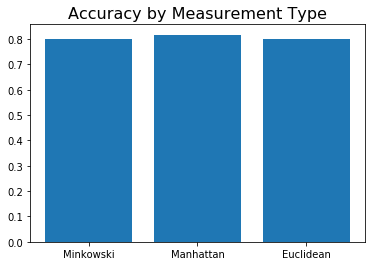

In [27]:
functs = ['Minkowski', 'Manhattan', 'Euclidean']

res = [mink, manh, eucl]

plt.bar(functs, res)
plt.title('Accuracy by Measurement Type', fontsize = 16)

In [28]:
print(mink, manh, eucl)

0.7987671979294374 0.8169527312355265 0.7987671979294374


Checking to see if p will make a difference.

In [29]:
knn_manhattan_p1 = KNeighborsClassifier(n_neighbors=11, metric='manhattan', p=1)
knn_manhattan_p1.fit(Xs_train, ys_train['Comment_Y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=11, p=1,
           weights='uniform')

In [30]:
knn_manhattan.score(Xs_train, ys_train['Comment_Y'])

0.8169527312355265

In [31]:
knn_manhattan_train_pred = knn_manhattan.predict(Xs_train)

In [32]:
knn_manhattan_test_pred = knn_manhattan.predict(Xs_test)

In [33]:
print("In-Sample Classification Report for kNN-Manhattan: \n\n", classification_report(ys_train['Comment_Y'],knn_manhattan_train_pred))

In-Sample Classification Report for kNN-Manhattan: 

               precision    recall  f1-score   support

           0       0.79      0.91      0.84     16087
           1       0.87      0.70      0.78     13277

   micro avg       0.82      0.82      0.82     29364
   macro avg       0.83      0.81      0.81     29364
weighted avg       0.82      0.82      0.81     29364



In [34]:
print("Out-of-Sample Classification Report for kNN-Manhattan: \n\n", classification_report(ys_test['Comment_Y'],knn_manhattan_test_pred))

Out-of-Sample Classification Report for kNN-Manhattan: 

               precision    recall  f1-score   support

           0       0.76      0.89      0.82      6849
           1       0.83      0.66      0.74      5736

   micro avg       0.78      0.78      0.78     12585
   macro avg       0.79      0.77      0.78     12585
weighted avg       0.79      0.78      0.78     12585



In [35]:
knn_manhattan_train = pd.DataFrame(confusion_matrix(ys_train, knn_manhattan_train_pred))
knn_manhattan_test = pd.DataFrame(confusion_matrix(ys_test, knn_manhattan_test_pred))

knn_manhattan_train.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
knn_manhattan_train.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)
knn_manhattan_test.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
knn_manhattan_test.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)

In [36]:
knn_manhattan_train

,Positive Predicted,Negative Predicted
Positive,14645,1442
Negative,3933,9344


In [37]:
knn_manhattan_test

,Positive Predicted,Negative Predicted
Positive,6070,779
Negative,1935,3801


In [38]:
(779+1935)/len(ys_test)

0.21565355582042114